In [2]:
###Import libraries
from qiskit import *
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import partial_trace,DensityMatrix
from rotation import diagonalize_XY_4site
from rotation import decompose_into_givens
from rotation import givens_rotation_matrix
import numpy as np
import scipy
import sympy
from qiskit import *
from numpy import *
import qiskit as q
from math import pi
import numpy as np
from qiskit.providers import *
from qiskit.providers.basicaer import *
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal, CompleteMeasFitter, TensoredMeasFitter)
from numpy.fft import fft
from scipy import fftpack
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as circuit
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import plot_state_city
from typing import List, Union
from qiskit import Aer, transpile
from scipy import linalg
import math
from fractions import Fraction
from qiskit.quantum_info import Pauli
import time
from scipy.optimize import minimize
from qiskit.algorithms.optimizers import COBYLA, SPSA, ADAM, AQGD, NELDER_MEAD, L_BFGS_B
from itertools import combinations
from qiskit.compiler import assemble
from qiskit.test.mock import FakeVigo
from qiskit.circuit import Parameter
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
from matplotlib import style 
from qiskit import execute, BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity
from qiskit.extensions import RXGate, XGate, CXGate
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterExpression
from typing import Union, Set, List
import math
import random
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.ignis.verification import *
from qiskit.quantum_info import state_fidelity
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit_ibm_provider import *
from qiskit_ibm_provider import IBMProvider

###To upload you IBMQ Experience account credentials
#IBMQ.delete_account()
#IBMQ.save_account("") ###insert IBMQ Experience account token
#IBMQ.load_account()
# Load a previously saved account.
#provider = IBMQ.get_provider(hub ='', group ='', project='') ###insert hub, group, project details
###

%matplotlib inline
#style.use("classic")
from qiskit.algorithms.amplitude_amplifiers import *
from qiskit.algorithms.amplitude_estimators import *
from qiskit.algorithms.eigen_solvers import *
from qiskit.algorithms.factorizers import *
from qiskit.algorithms.minimum_eigen_solvers import *
#from qiskit.algorithms.VariationalAlgorithm import *
from qiskit.utils.algorithm_globals import *
from qiskit.algorithms.optimizers import *
from qiskit.opflow import *

/var/folders/_l/2hvf2stx55nd9sl98j6by_g40000gn/T/ipykernel_74007/4098339954.py:40: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeVigo


In [8]:
### Generate the calibration circuits
qr = q.QuantumRegister(2)
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

In [9]:
state_labels

['00', '01', '10', '11']

In [10]:
### Execute the calibration circuits without noise
backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(meas_calibs, backend=backend, shots=8000)
cal_results = job.result()

In [11]:
### The calibration matrix without noise is the identity matrix
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
print(meas_fitter.cal_matrix)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [12]:
simulator = Aer.get_backend('aer_simulator')
qasm_sim = Aer.get_backend("qasm_simulator")
state_vec_sim = Aer.get_backend('statevector_simulator')
### For IBMQ simulator
# ibmq_backend = provider.get_backend("ibm_hanoi") ###can change the ibmq backend
# properties = ibmq_backend.properties()
# coupling_map = ibmq_backend.configuration().coupling_map
# from qiskit.providers.aer.noise import NoiseModel
# noise_model = NoiseModel.from_backend(properties)
# basis_gates = noise_model.basis_gates

In [13]:
### Obtaining the calibration matrix with IBMQ hardware
# no_shots = 8000
# job = execute(meas_calibs, backend = ibmq_backend, initial_layout = [1,2], shots = no_shots) ###can change the initial_layout (choice of qubits)
# job_monitor(job)
# cal_results = job.result()
### Calculate the calibration matrix with the noise model
# meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
# print(meas_fitter.cal_matrix)

In [14]:
# Calculate the calibration matrix with the noise model
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
print(meas_fitter.cal_matrix)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


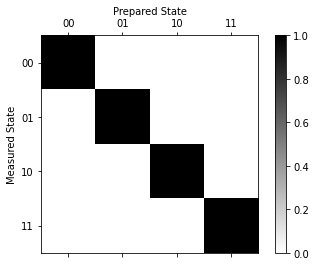

In [15]:
# Plot the calibration matrix
meas_fitter.plot_calibration()

In [16]:
# What is the measurement fidelity?
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())
# Get the filter object
meas_filter = meas_fitter.filter

Average Measurement Fidelity: 1.000000


In [17]:
#define the class HamiltonianEvolutionCircuit_New
class HamiltonianEvolutionCircuit_New: 
    N_sites = 0
    alpha = 0
    beta = 0
    sim = 0
    t = 0
    i = 0
    j = 0
    J_zz = 0
    J_yy = 0
    J_xx = 0
    J_z = 0
    h_T = 0
    J_ = 0
    J_XY = 0
    gamma_XY = 0
    D_XY = 0
    JxxZ = 0
    JyyZ = 0
    JzZ = 0
    Jx = 0
    Jy = 0
    print("Values of alpha and beta can be chosen as follows: x(1), y(2), z(3).")
    def __init__(self, N, a, b, simulator, t_evolve, i_alpha, j_beta, hamiltonian_type):
        #Number of sites, alpha, beta, simulator, time to evolve to, i (alpha), j (beta), type of hamiltonian
        self.h_T = 0
        self.J_ = 0
        self.J_z = 0
        self.J_zz = 0
        self.J_yy = 0
        self.J_xx = 0
        self.J_XY = 0
        self.gamma_XY = 0
        self.D_XY = 0
        self.JxxZ = 0
        self.JyyZ = 0
        self.JzZ = 0
        self.Jx = 0
        self.Jy = 0
        self.N_sites = N
        self.alpha = a
        self.beta = b
        self.t = t_evolve
        self.i = i_alpha
        self.j = j_beta
        self.sim = simulator
        self.ham = hamiltonian_type
        ####Edit here when adding more hamiltonians####
        if(self.ham == 1):
            print("You have chosen the Transverse Ising Model.")
            self.h_T = float(input("Insert value of hT for the Transverse Ising Model: "))
            self.J_ = float(input("Insert value of J for the Transverse Ising Model: "))
        elif(self.ham == 2):
            print("You have chosen the 1D Heisenberg (XXZ) Model.")
            self.J_z = float(input("Insert value of Jz for the XXZ Model: "))
            self.J_zz = float(input("Insert value of Jzz for the XXZ Model: "))
            self.J_yy = float(input("Insert value of Jyy for the XXZ Model: "))
            self.J_xx = float(input("Insert value of Jxx for the XXZ Model: "))
        elif(self.ham == 3):
            print("You have chosen the 1D Anistropic XY Chain Model.")
            self.J_XY = float(input("Insert value of J for the Anisotropic XY Model: "))
            self.gamma_XY = float(input("Insert value of Gamma for the Anisotropic XY Model: "))
            self.D_XY = float(input("Insert value of D for the Anisotropic XY Model: "))
        elif(self.ham == 4):
            print("You have chosen the 1D XYZ Chain Model.")
            self.JxxZ = float(input("Insert value of Jxx for the XYZ Model: "))
            self.JyyZ = float(input("Insert value of Jyy for the XYZ Model: "))
            self.JzZ = float(input("Insert value of Jz for the XYZ Model: "))
        elif(self.ham == 5):
            print("You have chosen the 1D XY Chain Model.")
            self.Jx = float(input("Insert value of Jx for the XY Model: "))
            self.Jy = float(input("Insert value of Jy for the XY Model: "))
        else:
            print("You have chosen a wrong value for the hamiltonian model options, please choose again.")
            while not (self.ham == 1 or self.ham == 2 or self.ham == 3 or self.ham == 4 or self.ham == 5):
                self.ham = float(input("Choose a hamiltonian model."))
        ################################################
        while(self.N_sites < 2):
            print("The number of sites must be at least 2. Please re-enter a value for it.")
            self.N_sites = float(input("The number of sites is equal to: "))   
        while(self.i > self.N_sites or self.i < 0):
            print("When choosing which site, you must choose between the range of 1 to the number of sites.")
            self.i = float(input("The site that will be used for the alpha gate is: "))
        while(self.j > self.N_sites or self.j < 0):
            print("When choosing which site, you must choose between the range of 1 to the number of sites.")
            self.j = float(input("The site that will be used for the beta gate is: "))
        if(self.alpha == 1):
            print("Alpha is x.")
        elif(self.alpha == 2):
            print("Alpha is y.")
        elif(self.alpha == 3):
            print("Alpha is z.")
        else:
            print("You have chosen a wrong value for alpha, please choose again.")
            while not (self.alpha == 1 or self.alpha == 2 or self.alpha == 3):
                self.alpha = float(input("Enter your value for alpha, where x(1), y(2), and z(3): "))
        if(self.beta == 1):
            print("Beta is x.")
        elif(self.beta == 2):
            print("Beta is y.")
        elif(self.beta == 3):
            print("Beta is z.")
        else:
            print("You have chosen a wrong value for beta, please choose again.")
            while not (self.beta == 1 or self.beta == 2 or self.beta == 3):
                self.beta = float(input("Enter your value for beta, where x(1), y(2), and z(3): "))
        print("You have chosen the real part of the correlation function.")
        if(self.sim == 0):
            print("You have chosen the qasm simulator backend.")
        elif(self.sim == 1):
            print("You have chosen the IBM-Q backend.")
        elif(self.sim == 2):
            print("You have chosen the statevector simulator backend.")
        else:
            print("You have chosen a wrong value for your choice of the qasm simulator, statevector simulator, or the IBM-Q backend, please choose again.")
            while not (self.sim == 0 or self.sim == 1):
                self.sim = float(input("Enter your value for you choice of the qasm simulator, statevector simulator, or the IBM-Q backend, where qasm(0), IBM-Q(1), statevec(2): "))
    def linspace(self, start, stop, numb):
        if numb == 1.0:
            yield stop
            return
        h = (stop - start) / (numb - 1)
        for i in range(numb):
            yield start + h * i
    def Create_Circuit(self):
        reg1 = self.N_sites
        #return q.QuantumCircuit(reg1 + 1, reg1 + 1) 
        return q.QuantumCircuit(reg1, reg1) 
    def Draw_Plot_Qasm(self, Corr0, Corr1, Corr0_mit, Corr1_mit, JTime, t_evolv, tau):
        len_corr = len(Corr0)
        diff1 = []
        diff2 = []
        diff3 = []
        diff4 = []
        k = 0
        l = 0
        m = 0
        d = 0
        while (k < len_corr):
            diff1.append(Corr0[k] - Corr1[k])
            k += 1
        while (l < len_corr):
            diff2.append(Corr1[l] - Corr0[l])
            l += 1
        while (m < len_corr):
            diff3.append(Corr0_mit[m] - Corr1_mit[m])
            m += 1
        while (d < len_corr):
            diff4.append(Corr1_mit[d] - Corr0_mit[d])
            d += 1
        ##########################################
        # Frequency and sampling rate
        import numpy as np
        import math
        Fs = tau # sampling rate
        Jt = JTime
        print(JTime)
        t = t_evolv
        print("This is the size of t", size(Jt))
        #Real and Imaginary Parts of thr Correlation Function
        y = diff1
        y_mit = diff3
        print("This is the correlation function WITHOUT mitigation.")
        print(y)
        print("This is the correlation function WITH mitigation.")
        print(y_mit)
        print("This is the size of y", size(y))
        # Perform Fourier transform using scipy
        from scipy import fftpack
        y_fft = fftpack.fft(y)
        print("This is the size of y_fft", size(y_fft))
        # Plot data
        n = np.size(Jt)
        print("This is n", n)
        fr = (1/(Fs*2)) * np.linspace(0,t,int(n/2))
        print("This is the size of fr", size(fr))
        y_m = 2/n * abs(y_fft[0:np.size(fr)])
        print("This is the size of y_m", size(y_m))
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
        ax[0].plot(Jt, y)    # plot time series
        ax[1].stem(fr, y_m) # plot freq domain
        ######################################
        ax[0].set_xlabel('Jt')
        ax[0].set_ylabel('Real Part of the Correlation Function')
        ax[1].set_xlabel('Frequency')
        ax[1].set_ylabel('Fourier Transform of the Real Part of the Correlation Function')
        plt.savefig('Correlation_Function.png')
        with open('Trott_Ind_Ising.txt', 'a') as file:
            file.write("This is a correlation function.")
            file.write('\n')
            file.write('[ ')
            file.write(', '.join(str(element) for element in y))
            file.write(' ]')
            file.write('\n')
    def ExecuteAndPlot(self,qCircuit,JTime,t_evolv,tau):
        Corr0 = []
        Corr1 = []
        Corr0_mit = []
        Corr1_mit = []
        statevec = []
        counter_state = 0
        no_of_circuits = len(qCircuit)
        counter_circuits = 0
        no_shots = 8000
        qasm_sim = q.Aer.get_backend("qasm_simulator")
        state_vec_sim = Aer.get_backend('statevector_simulator')
        ibmq_backend = provider.get_backend("ibm_auckland")
        properties = ibmq_backend.properties()
        coupling_map = ibmq_backend.configuration().coupling_map
        from qiskit.providers.aer.noise import NoiseModel
        noise_model = NoiseModel.from_backend(properties)
        basis_gates = noise_model.basis_gates
        while(counter_circuits < no_of_circuits):
            if(self.sim == 0): 
                results = execute(qCircuit[counter_circuits], backend = qasm_sim, shots = no_shots).result()
                counts = results.get_counts(qCircuit[counter_circuits])
                probs = sorted([(i, c/no_shots) for i, c in counts.items()])
                iter = 0
                p1 = 0
                p2 = 0
                p3 = 0
                p4 = 0
                while(iter != size(probs)/2): 
                    if(probs[iter][0] == '00'):
                        p1 += probs[iter][1]
                    if(probs[iter][0] == '10'):
                        p2 += probs[iter][1]
                    if(probs[iter][0] == '01'):
                        p3 += probs[iter][1]
                    if(probs[iter][0] == '11'):
                        p4 += probs[iter][1]
                        ###############################
                    iter += 1 
                Corr0.append(math.pow(p1, 1) - math.pow(p2, 1))
                Corr1.append(math.pow(p3, 1) - math.pow(p4, 1))
                #############################################
            elif(self.sim == 1):
                qCircuit100 = [] 
                i = 0
                while(i != 100):
                    qCircuit100.append(qCircuit[i])
                    i += 1
                job = q.execute(qCircuit100, backend = ibmq_backend, initial_layout = [4,1], shots = no_shots)
                job_monitor(job)
                results = job.result()
                mitigated_results = meas_filter.apply(results)
                while(counter_circuits < no_of_circuits):
                    if(counter_circuits != 100):
                        counts = results.get_counts(qCircuit100[counter_circuits])
                        mit_counts = mitigated_results.get_counts(qCircuit100[counter_circuits])
                        probs = sorted([(i, c/no_shots) for i, c in counts.items()])
                        mit_probs = sorted([(i, c/no_shots) for i, c in mit_counts.items()])
                        iter0 = 0
                        iter1 = 0
                        p1 = 0 
                        p2 = 0
                        p3 = 0
                        p4 = 0
                        mit_p1 = 0 
                        mit_p2 = 0
                        mit_p3 = 0
                        mit_p4 = 0
                        while(iter0 != size(probs)/2):
                            if(probs[iter0][0] == '00'):
                                p1 += probs[iter0][1]
                            if(probs[iter0][0] == '10'):
                                p2 += probs[iter0][1]
                            if(probs[iter0][0] == '01'):
                                p3 += probs[iter0][1]
                            if(probs[iter0][0] == '11'):
                                p4 += probs[iter0][1]
                            iter0 += 1
                        while(iter1 != size(mit_probs)/2):
                            if(mit_probs[iter1][0] == '00'):
                                mit_p1 += mit_probs[iter1][1]
                            if(mit_probs[iter1][0] == '10'):
                                mit_p2 += mit_probs[iter1][1]
                            if(mit_probs[iter1][0] == '01'):
                                mit_p3 += mit_probs[iter1][1]
                            if(mit_probs[iter1][0] == '11'):
                                mit_p4 += mit_probs[iter1][1]
                            iter1 += 1
                        Corr0.append(p1 - p2)
                        Corr1.append(p3 - p4)
                        Corr0_mit.append(mit_p1 - mit_p2)
                        Corr1_mit.append(mit_p3 - mit_p4)
                        counter_circuits += 1 
                    else:
                        counts = results100.get_counts(qCircuit[counter_circuits])
                        mit_counts = mitigated_results100.get_counts(qCircuit[counter_circuits])
                        probs = sorted([(i, c/no_shots) for i, c in counts.items()])
                        mit_probs = sorted([(i, c/no_shots) for i, c in mit_counts.items()])
                        iter0 = 0
                        iter1 = 0
                        p1 = 0 
                        p2 = 0
                        p3 = 0
                        p4 = 0
                        mit_p1 = 0 
                        mit_p2 = 0
                        mit_p3 = 0
                        mit_p4 = 0
                        while(iter0 != size(probs)/2):
                            if(probs[iter0][0] == '00'):
                                p1 += probs[iter0][1]
                            if(probs[iter0][0] == '10'):
                                p2 += probs[iter0][1]
                            if(probs[iter0][0] == '01'):
                                p3 += probs[iter0][1]
                            if(probs[iter0][0] == '11'):
                                p4 += probs[iter0][1]
                            iter0 += 1
                        while(iter1 != size(mit_probs)/2):
                            if(mit_probs[iter1][0] == '00'):
                                mit_p1 += mit_probs[iter1][1]
                            if(mit_probs[iter1][0] == '10'):
                                mit_p2 += mit_probs[iter1][1]
                            if(mit_probs[iter1][0] == '01'):
                                mit_p3 += mit_probs[iter1][1]
                            if(mit_probs[iter1][0] == '11'):
                                mit_p4 += mit_probs[iter1][1]
                            iter1 += 1
                        Corr0.append(p1 - p2)
                        Corr1.append(p3 - p4)
                        Corr0_mit.append(mit_p1 - mit_p2)
                        Corr1_mit.append(mit_p3 - mit_p4)
                        counter_circuits += 1
        #Plot
        if(self.sim == 0 or self.sim == 1):
            self.Draw_Plot_Qasm(Corr0, Corr1, Corr0_mit, Corr1_mit, JTime, t_evolv, tau)
        else:
            return(statevec)
    def HamiltonianChoice(self, tau):
        n = self.N_sites
        XI = X^I
        IX = I^X
        IZ = I^Z
        ZI = Z^I
        ZZ = Z^Z
        XX = X^X
        YY = Y^Y
        XY = X^Y
        YX = Y^X
        if(self.ham == 1):
            ##Transverse Ising Model
            hT = self.h_T
            J = self.J_
            if(n == 2):
                two_qubit_Is = J * ZZ  + \
                               hT * IX + \
                               hT * XI 
            else:
                XI_op = SummedOp([])
                ZZ_op = SummedOp([])
                two_qubit_Is = SummedOp([])
                for i in range(n):
                    XI_op += hT*((I^(i))^X^(I^(n-i-1))) 
                for i in range(n-1):
                    ZZ_op += J*((I^(i))^(ZZ)^(I^(n-i-2)))
                two_qubit_Is = ZZ_op + XI_op
            evo_time = Parameter('θ')
            evolution_op = (evo_time*two_qubit_Is).exp_i()
            h2_measurement = StateFn(two_qubit_Is).adjoint()
            evo_and_meas = h2_measurement @ evolution_op 
            trotterized_op = PauliTrotterEvolution(trotter_mode=Suzuki(order=2, reps=1)).convert(evo_and_meas)
            bound = trotterized_op.bind_parameters({evo_time: tau}) #This is where you'd determine tau
            evolv_circ = bound.to_circuit_op()
            TC = bound[1].to_circuit()
            TC = transpile(TC,backend=Aer.get_backend('statevector_simulator'),optimization_level=3)
            return TC 
        elif(self.ham == 2):
            ##XXZ Model
            Jzz = self.J_zz
            Jyy = self.J_yy
            Jxx = self.J_xx
            Jz = self.J_z
            if(n == 2):
                two_qubit_Heis = Jz * IZ + \
                                 Jz * ZI + \
                                 Jzz * ZZ + \
                                 Jxx * XX + \
                                 Jyy * YY
            else:
                ZI_op = SummedOp([])
                ZZ_op = SummedOp([])
                XX_op = SummedOp([])
                YY_op = SummedOp([])
                two_qubit_Heis = SummedOp([])
                for i in range(n):
                    ZI_op += Jz*((I^(i))^Z^(I^(n-i-1))) 
                for i in range(n-1):
                    XX_op += Jxx*((I^(i))^(XX)^(I^(n-i-2)))
                    YY_op += Jyy*((I^i)^(YY)^(I^(n-i-2)))
                    ZZ_op += Jzz*((I^i)^(ZZ)^(I^(n-i-2)))
                two_qubit_Heis = ZI_op + ZZ_op + XX_op + YY_op
            evo_time = Parameter('θ')
            evolution_op = (evo_time*two_qubit_Heis).exp_i()
            h2_measurement = StateFn(two_qubit_Heis).adjoint()
            evo_and_meas = h2_measurement @ evolution_op 
            trotterized_op = PauliTrotterEvolution(trotter_mode=Suzuki(order=1, reps=1)).convert(evo_and_meas)
            bound = trotterized_op.bind_parameters({evo_time: tau}) #This is where you'd determine tau
            evolv_circ = bound.to_circuit_op()
            TC = bound[1].to_circuit()
            TC = transpile(TC,backend=Aer.get_backend('statevector_simulator'),optimization_level=3)
            return TC 
        elif(self.ham == 3):
            ##Aniso XY Model
            J = self.J_XY
            gamma = self.gamma_XY
            D = self.D_XY
            if(n == 2):
                two_qubit_XY = J*(1+gamma)*XX + \
                               J*(1-gamma)*YY + \
                               J*D*XY + \
                               J*D*YX
            else:
                XY_op = SummedOp([])
                YX_op = SummedOp([])
                XX_op = SummedOp([])
                YY_op = SummedOp([])
                two_qubit_XY = SummedOp([])
                for i in range(n-1):
                    XX_op += J*(1+gamma)*((I^i)^(XX)^(I^(n-i-2))) 
                    YY_op += J*(1+gamma)*((I^i)^(YY)^(I^(n-i-2)))
                    XY_op += J*D*((I^i)^(XY)^(I^(n-i-2)))
                    YX_op += J*D*((I^i)^(YX)^(I^(n-i-2)))
                two_qubit_XY = XX_op + YY_op + XY_op + YX_op
            evo_time = Parameter('θ')
            evolution_op = (evo_time*two_qubit_XY).exp_i()
            h2_measurement = StateFn(two_qubit_XY).adjoint()
            evo_and_meas = h2_measurement @ evolution_op 
            trotterized_op = PauliTrotterEvolution(trotter_mode=Suzuki(order=1, reps=1)).convert(evo_and_meas)
            bound = trotterized_op.bind_parameters({evo_time: tau}) #This is where you'd determine tau
            evolv_circ = bound.to_circuit_op()
            TC = bound[1].to_circuit()
            TC = transpile(TC,backend=Aer.get_backend('statevector_simulator'),optimization_level=3)
            return TC 
        elif(self.ham == 4):
            ##XY Model
            Jxx = self.JxxZ
            Jyy = self.JyyZ
            Jz = self.JzZ
            if(n == 2):
                two_qubit_XYZ = Jxx*XX + \
                               Jyy*YY + \
                               Jz*ZI + \
                               Jz*IZ
            else:
                ZI_op = SummedOp([])
                XX_op = SummedOp([])
                YY_op = SummedOp([])
                two_qubit_XYZ = SummedOp([])
                for i in range(n):
                    ZI_op += Jz*((I^(i))^Z^(I^(n-i-1))) 
                for i in range(n-1):
                    XX_op += Jxx*((I^i)^(XX)^(I^(n-i-2))) 
                    YY_op += Jyy*((I^i)^(YY)^(I^(n-i-2)))
                two_qubit_XYZ = XX_op + YY_op + ZI_op
            evo_time = Parameter('θ')
            evolution_op = (evo_time*two_qubit_XYZ).exp_i()
            h2_measurement = StateFn(two_qubit_XYZ).adjoint()
            evo_and_meas = h2_measurement @ evolution_op 
            trotterized_op = PauliTrotterEvolution(trotter_mode=Suzuki(order=1, reps=1)).convert(evo_and_meas)
            bound = trotterized_op.bind_parameters({evo_time: tau}) #This is where you'd determine tau
            evolv_circ = bound.to_circuit_op()
            TC = bound[1].to_circuit()
            TC = transpile(TC,backend=Aer.get_backend('statevector_simulator'),optimization_level=3)
            return TC 
        elif(self.ham == 5):
            ##XY Model
            Jx = self.Jx
            Jy = self.Jy
            if(n == 2):
                two_qubit_xy = Jx*XX + \
                               Jy*YY 
            else:
                XX_op = SummedOp([])
                YY_op = SummedOp([])
                two_qubit_xy = SummedOp([])
                for i in range(n-1):
                    XX_op += Jx*((I^i)^(XX)^(I^(n-i-2))) 
                    YY_op += Jy*((I^i)^(YY)^(I^(n-i-2)))
                two_qubit_xy = XX_op + YY_op
            evo_time = Parameter('θ')
            evolution_op = (evo_time*two_qubit_xy).exp_i()
            h2_measurement = StateFn(two_qubit_xy).adjoint()
            evo_and_meas = h2_measurement @ evolution_op 
            trotterized_op = PauliTrotterEvolution(trotter_mode=Suzuki(order=1, reps=1)).convert(evo_and_meas)
            bound = trotterized_op.bind_parameters({evo_time: tau}) #This is where you'd determine tau
            evolv_circ = bound.to_circuit_op()
            TC = bound[1].to_circuit()
            TC = transpile(TC,backend=Aer.get_backend('statevector_simulator'),optimization_level=3)
            return TC
    def Circ_Func(self):
        circuit_array = []
        JTime = []
        counter1 = 0 
        reg = self.N_sites   
        dummy_counter = 0
        t_evolv = self.t
        t = 0         
        i_gate = self.i
        j_gate = self.j
        steps = float(input("How many steps do you want?: ")) ##set this on our own
        tau = t_evolv/steps 
        qr = QuantumRegister(reg)
        print("Which initial state do you want to begin with?")
        initial_state = float(input("11 State (0); 10+01 State (1); 10-01 State (2); 00 State (3): "))
        while(initial_state != 0 and initial_state != 1 and initial_state != 2 and initial_state != 3 and initial_state != 4):
            print("Please, re-enter correct value corresponding to the initial state you want")
            initial_state = float(input("11 State (0); 10+01 State (1); 10-01 State (2); 00 State (3): "))
        while (t < t_evolv): 
            #circuit = q.QuantumCircuit(reg, 1)
            circuit = self.Create_Circuit()
            #Initial State
            if(initial_state == 0):
                while(counter1 != reg):
                    circuit.x(counter1)
                    counter1 += 1
                counter1 = 0
                circuit.barrier()
            elif(initial_state == 1):
                circuit.h(0)
                circuit.cx(0,1)
                circuit.x(0)
                circuit.barrier()
            elif(initial_state == 2):
                circuit.x(0)
                circuit.h(0)
                circuit.cx(0,1)
                circuit.x(0)
                #############
#                 circuit.h(0)
#                 circuit.h(1)
                circuit.barrier()
            elif(initial_state == 3):
                circuit.barrier()
            elif(initial_state == 4):
                circuit.x(1)
                circuit.barrier()
            #####
            #alpha gate attempt
            if(self.alpha == 1):
                #circuit.x(i_gate - 1)
                circuit.h(i_gate - 1)
                circuit.measure(i_gate - 1,0)
                circuit.h(i_gate - 1)
            elif(self.alpha == 2):
                circuit.rx(math.pi/2,i_gate - 1)
                circuit.measure(i_gate - 1,0)
                circuit.rx(-1*math.pi/2,i_gate - 1)
            elif(self.alpha == 3):
                circuit.measure(i_gate - 1,0)
            circuit.barrier()
            #######U(Tau)########
            if(dummy_counter == 0):
                TC = self.HamiltonianChoice(tau)
            num = 0
            while(num != dummy_counter):
                circuit = circuit.compose(TC, list(range(0,reg))) ##
                num += 1
            ######################
            circuit.barrier()
            #beta gate attempt
            if(self.beta == 1):
                #circuit.x(j_gate - 1)
                circuit.h(j_gate - 1)
                circuit.measure(j_gate - 1,1)
            elif(self.beta == 2):
                circuit.rx(math.pi/2,j_gate - 1)
                circuit.measure(j_gate - 1,1)
            elif(self.beta == 3):
                circuit.measure(j_gate - 1,1)
            #######################
            if(self.ham == 1):
                y = abs(self.J_)*t
            elif(self.ham == 2):
                y = abs(self.J_zz)*t
            elif(self.ham == 3):
                y = abs(self.J_XY)*t
            elif(self.ham == 4):
                y = abs(self.JxxZ)*t
            elif(self.ham == 5):
                y = abs(self.Jx)*t
            JTime.append(y)
            t = t + tau
            dummy_counter += 1
            circuit_array.append(circuit)
        print(circuit_array[1])
        #print(circuit_array[2])
        #print(circuit_array[1].global_phase)
        print("The number of gates in the circuit is:", circuit_array[1].size())
        ######Execution and Plotting
        res = self.ExecuteAndPlot(circuit_array, JTime, t_evolv, tau)
        #print(type(res[1]))
        if(self.sim == 2):
            print(res)

Values of alpha and beta can be chosen as follows: x(1), y(2), z(3).


In [18]:
### Example of class instance: (uncomment the last two lines)
###Number of sites, alpha, beta, qasm/ibm-q/statevec, time to evolve to, i (alpha), j (beta), type of hamiltonian
#evolv_sim = HamiltonianEvolutionCircuit_New(2, 3, 3, 1, 30, 1, 1, 2)
#evolv_sim.Circ_Func()